## Transformar Celsius em Fahrenheit 

In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

tf.__version__

'2.11.0'

In [42]:
# Read all the data
temp_df = pd.read_csv(join("Celsius-to-Fahrenheit.csv"))
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [43]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [44]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

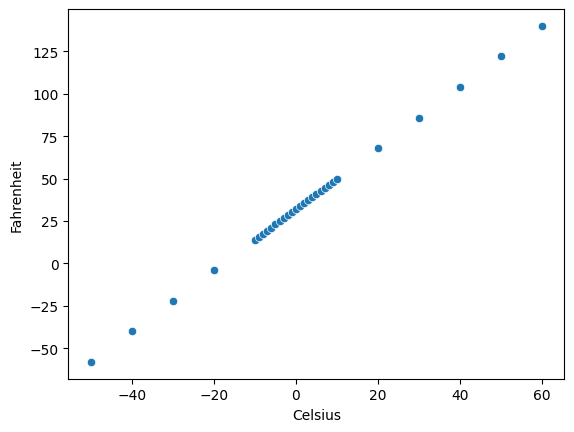

In [45]:
sns.scatterplot(x=temp_df['Celsius'], y=temp_df['Fahrenheit'])

In [46]:
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

x_train

0    -50
1    -40
2    -30
3    -20
4    -10
5     -9
6     -8
7     -7
8     -6
9     -5
10    -4
11    -3
12    -2
13    -1
14     0
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    20
26    30
27    40
28    50
29    60
Name: Celsius, dtype: int64

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a perceptron
model = Sequential()

model.add(Dense(units=1, input_shape=[1]))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Train it.
model.compile(optimizer=Adam(0.5), loss="mean_squared_error")

trained_hist = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 531ms/step - loss: 6109.2021
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 4593.9434
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 3342.9878
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 2357.0540
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1630.6799
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 1149.6864
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 888.6806
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 809.5375
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 862.4526
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 990.8533
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 1139.6840
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 1264.2357
Epoch 13/300
1/1 [========

In [49]:
trained_hist.history.keys()

dict_keys(['loss'])

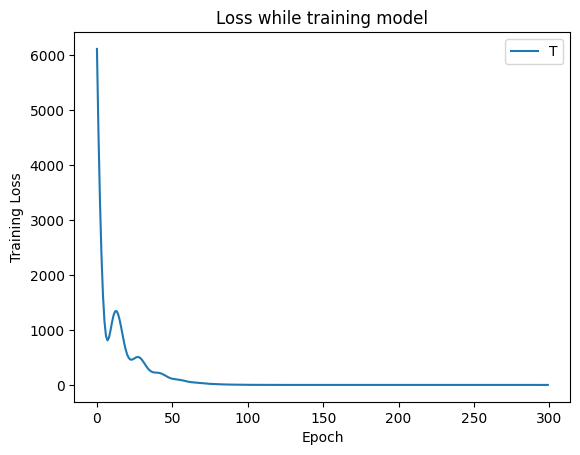

In [50]:
plt.plot(trained_hist.history['loss'])
plt.title("Loss while training model")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend("Training Loss")

In [51]:
model.get_weights()

[array([[1.7999995]], dtype=float32), array([32.000042], dtype=float32)]

In [53]:
# Testings?
temp_celsius = 32
model_fah = model.predict([temp_celsius])
actual_fah = (9/5) * temp_celsius + 32

model_fah[0, 0], actual_fah

1/1 [==============================] - 0s 59ms/step


(89.60002, 89.6)